## LIBRARY

In [ ]:
import pandas as pd #library untuk buka data
import numpy as np #library untuk replace data
import matplotlib.pyplot as plt #library untuk grafik
from sklearn.naive_bayes import GaussianNB #library untuk menghitung peluang gaussian
import seaborn as sns #library untuk grafik

## LOAD DATASET

In [ ]:
#Baca data csv dengan library pandas
dataFrame = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTSRg6g9VltRd_PzjFVJYLNPdIqLcis6SaPiqicxQREi8MM_ELES0oByZUH0xQAXTkC8u1HkY-h4zUV/pub?gid=1810807757&single=true&output=csv')
nRow, nCol = dataFrame.shape
print(f'Baris : {nRow} \nKolom :  {nCol} ')

Baris : 452 
Kolom :  280 


## DATA EXPLORATION

In [ ]:
#Replace Data "?" dengan NaN
def replaceUnknownData(dataFrame):
    return dataFrame.replace(["?"], np.NaN)

dataFrame = replaceUnknownData(dataFrame)
dataFrame

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,classes
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [ ]:
#Menampilkan Jumlah data NaN disetiap kolom dan persentasenya
def unknownDataReport(dataFrame):
    NaN = dataFrame.isnull().sum()
    print('Total Data "?" :')
    for i in range(len(dataFrame.columns)):
        if NaN[i] != 0 and NaN[i] > 0 :
            print("Total Data Hilang Kolom "f"{dataFrame.columns[i]} : {NaN[i]} || Persentase : {(NaN[i]/len(dataFrame))*100}%")
    sumRows = dataFrame.shape[0]
    sumColumns = dataFrame.shape[1]
    sumCells = sumRows * sumColumns
    sumMissing = NaN.sum()
    print(f"\nTotal data yang hilang keseluruhan : {sumMissing} || Persentase : {(sumMissing/sumCells) * 100}%\n")

In [ ]:
unknownDataReport(dataFrame)

Total Data "?" :
Total Data Hilang Kolom T : 8 || Persentase : 1.7699115044247788%
Total Data Hilang Kolom P : 22 || Persentase : 4.867256637168142%
Total Data Hilang Kolom QRST : 1 || Persentase : 0.22123893805309736%
Total Data Hilang Kolom J : 376 || Persentase : 83.1858407079646%
Total Data Hilang Kolom heart_rate : 1 || Persentase : 0.22123893805309736%

Total data yang hilang keseluruhan : 408 || Persentase : 0.3223767383059419%



In [ ]:
#Menampilkan Jumlah data "0" disetiap kolom dan persentasenya
def zeroDataReport(dataFrame):
    print('Total Data "0" :')
    zeroValueTotal = 0
    for col in dataFrame.columns:
        col_values = dataFrame[col]
        count = (col_values == 0).sum()
        zeroValueTotal += count
        print("Total Data Hilang Kolom "f"{col} : {count} || Persentase : {(count/len(dataFrame))*100}%")
    sumRows = dataFrame.shape[0]
    sumColumns = dataFrame.shape[1]
    sumCells = sumRows * sumColumns
    sumMissing = zeroValueTotal
    print(f"\nTotal data yang bernilai '0' keseluruhan : {sumMissing} || Persentase : {(sumMissing/sumCells) * 100}%\n")

In [ ]:
zeroDataReport(dataFrame)

Total Data "0" :
Total Data Hilang Kolom age : 1 || Persentase : 0.22123893805309736%
Total Data Hilang Kolom sex : 203 || Persentase : 44.911504424778755%
Total Data Hilang Kolom height : 0 || Persentase : 0.0%
Total Data Hilang Kolom weight : 0 || Persentase : 0.0%
Total Data Hilang Kolom qrs_duration : 0 || Persentase : 0.0%
Total Data Hilang Kolom p-r_interval : 18 || Persentase : 3.982300884955752%
Total Data Hilang Kolom q-t_interval : 0 || Persentase : 0.0%
Total Data Hilang Kolom t_interval : 0 || Persentase : 0.0%
Total Data Hilang Kolom p_interval : 12 || Persentase : 2.6548672566371683%
Total Data Hilang Kolom qrs : 3 || Persentase : 0.6637168141592921%
Total Data Hilang Kolom T : 0 || Persentase : 0.0%
Total Data Hilang Kolom P : 0 || Persentase : 0.0%
Total Data Hilang Kolom QRST : 0 || Persentase : 0.0%
Total Data Hilang Kolom J : 0 || Persentase : 0.0%
Total Data Hilang Kolom heart_rate : 0 || Persentase : 0.0%
Total Data Hilang Kolom q_wave : 334 || Persentase : 73.8938

### Outliner Data

Boxplot Height


<Axes: >

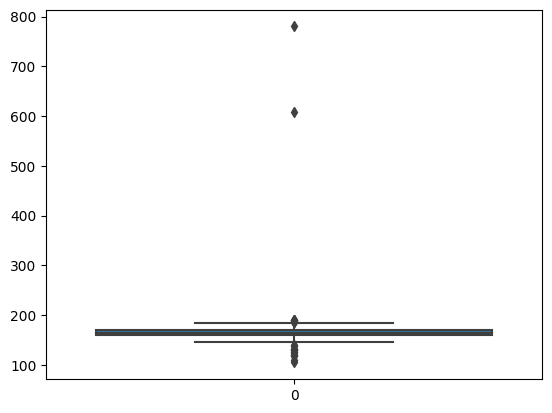

In [ ]:
#cek Data Outline dengan menggunakan boxplot untuk kolom height
print("Boxplot Height")
sns.boxplot(dataFrame['height'])

Boxplot weight


<Axes: >

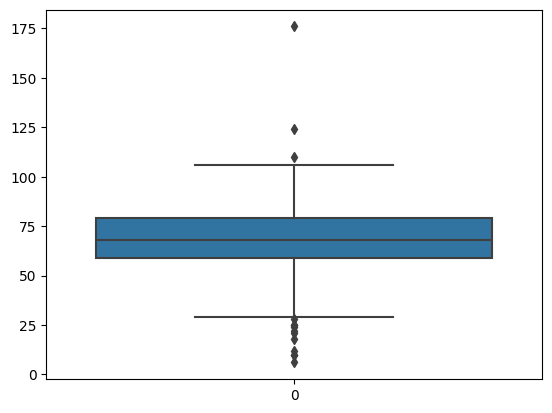

In [ ]:
#cek Data Outline dengan menggunakan boxplot untuk kolom height
print("Boxplot weight")
sns.boxplot(dataFrame['weight'])

Boxplot age


<Axes: >

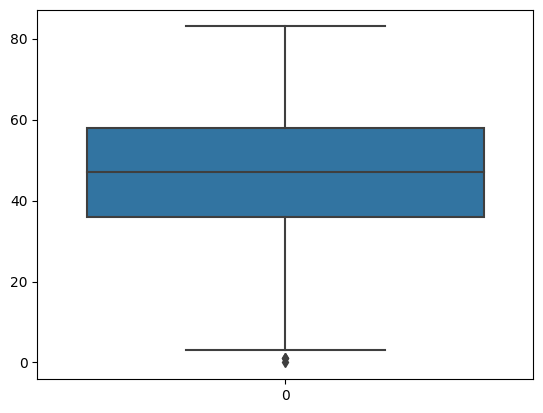

In [ ]:
#cek Data Outline dengan menggunakan boxplot untuk kolom Age
print("Boxplot age")
sns.boxplot(dataFrame['age'])

### Data Visualization

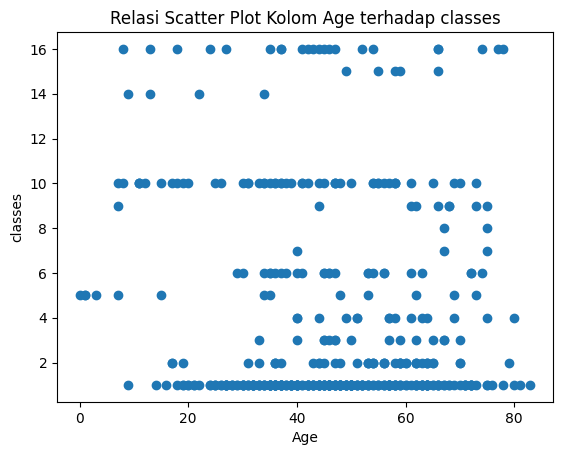

In [ ]:
plt.scatter(dataFrame['age'],dataFrame['classes'])
plt.title('Relasi Scatter Plot Kolom Age terhadap classes')
plt.xlabel("Age")
plt.ylabel("classes")
plt.show()

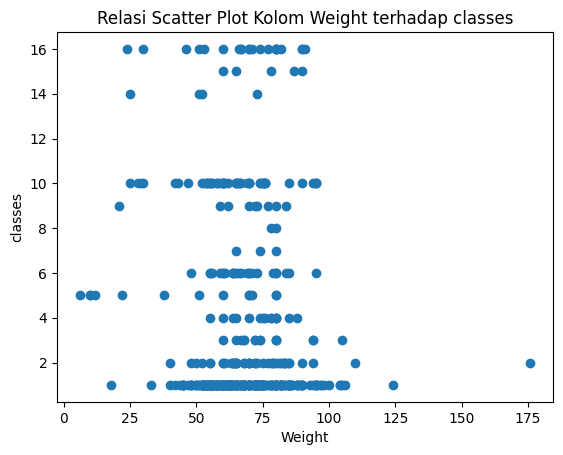

In [ ]:
plt.scatter(dataFrame['weight'],dataFrame['classes'])
plt.title('Relasi Scatter Plot Kolom Weight terhadap classes')
plt.xlabel("Weight")
plt.ylabel("classes")
plt.show()

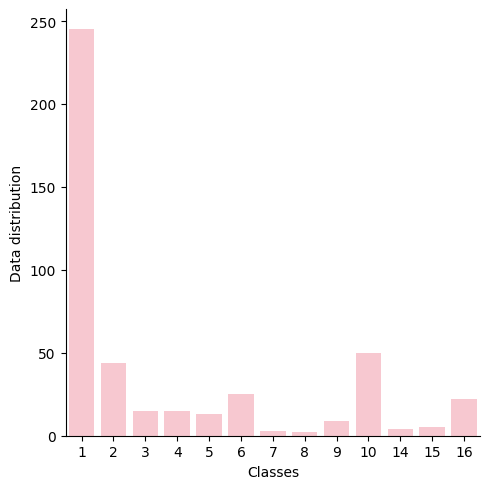

In [ ]:
#Grafik distribusi data terhadap kolom classes
sns.catplot(x='classes', data=dataFrame, kind='count',color='pink')
plt.ylabel('Data distribution')
plt.xlabel('Classes')
plt.show()

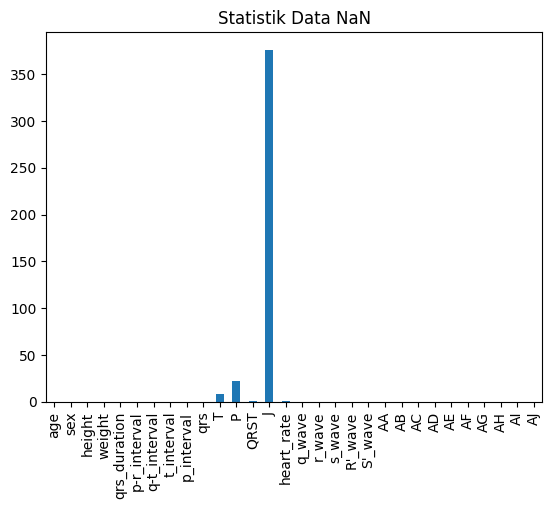

In [ ]:
dataFrame.isna().sum()[:30].plot.bar() #menampilkan statistik data yang NaN dalam bar
plt.title('Statistik Data NaN')
plt.show()

## PREPROCESSING

### Handle Outliner Data

In [ ]:
#dalam kolom height terdapat data yang tidak masuk akal replace data tersebut dengan rata2 dari kolom height
replaceDataHeight = sorted(dataFrame["height"], reverse=True)
for data in dataFrame.height:
  if data == replaceDataHeight[0] or data == replaceDataHeight[1] :
    dataFrame['height'] = dataFrame['height'].replace([data], int(dataFrame["height"].mean()))


### Handle Missing Value

In [ ]:
#menambahkan kolom yang mengandung data "0" lebih dari 98% ke dalam list
zeroDataCol = []
NaN = dataFrame.isnull().sum()
for col in dataFrame.columns:
    col_values = dataFrame[col]
    count = (col_values == 0).sum()
    percentage = (count/len(dataFrame))*100
    if percentage > 98 :
        zeroDataCol.append(col)

In [ ]:
#menambahkan kolom yang mengandung data "?" ke dalam list
unknownDataCol = []
NaN = dataFrame.isnull().sum()
for i in dataFrame.columns:
    if NaN[i] != 0 and NaN[i] > 0 :
        unknownDataCol.append(i)

In [ ]:
#Menggabungkan dua list diatas untuk dibersihkan
toDropData = zeroDataCol + unknownDataCol

In [ ]:
# Menghapus Semua Data yang hilang dan data yang mengandung nilai "0" lebih dari 98%
dataFrame.drop(toDropData, axis=1, inplace=True)

### Handle Imbalance Data

Data harus dirapikan menjadi 2 class dikarenakan distribusi data terhadap kolom target "Classes" tidak stabil, Classes kita golongkan menjadi Normal Dan Sakit dikarenakan menurut data yang ada untuk classes 1 tidak terdapat gejala dan classes 2 - 16 terdapat gejala yang berbeda

Distribusi Data yang tidak stabil tersebut akan mempengaruhi probabilitas gaussian untuk memplejari pola data train terhadap kolom target "Classes"

In [ ]:
#Replace nilai kolom classes 1 menjadi NORMAL
#Replace nilai kolom classes 2 menjadi TERINDIKASI
for i in dataFrame.classes:
    if i == 1 :
      dataFrame['classes'] = dataFrame['classes'].replace([i], "NORMAL")
    elif i > 1 :
      dataFrame['classes'] = dataFrame['classes'].replace([i], "TERINDIKASI")

## NORMALIZATION

Normalisasi digunakan untuk menyamakan skala dari keseluruhan dataframe

In [ ]:
#Membuat list baru untuk normalisasi tanpa mengikutkan kolom sex dan classes
col_norm = []
for i in dataFrame.columns :
    if i != "sex" and i != "classes" :
        col_norm.append(i)

In [ ]:
#Normalization menggunakan rasio min max
def normalization(allData, ColumnTarget):
  for column in ColumnTarget:
    allData[column] = (allData[column] - allData[column].min()) / (allData[column].max() - allData[column].min())

  return allData

dataFrame = normalization(dataFrame, col_norm)

## FOLDING

In [ ]:
data = dataFrame.copy()

#Rasio Folding 1/4

fold1 = (data.iloc[0:90].reset_index(drop=True), data.iloc[90:452].reset_index(drop=True))
fold2 = (data.iloc[90:180].reset_index(drop=True), pd.concat([data.iloc[0:90], data.iloc[180:452]]).reset_index(drop=True))
fold3 = (data.iloc[180:270].reset_index(drop=True), pd.concat([data.iloc[0:180], data.iloc[270:452]]).reset_index(drop=True))
fold4 = (data.iloc[270:360].reset_index(drop=True), pd.concat([data.iloc[0:270], data.iloc[360:452]]).reset_index(drop=True))
fold5 = (data.iloc[362:452].reset_index(drop=True), data.iloc[0:362].reset_index(drop=True))

test, train = fold1
print(f"Banyak data test : {len(test)}")
print(f"Banyak data train : {len(train)}")
test, train = fold2
print(f"Banyak data test : {len(test)}")
print(f"Banyak data train : {len(train)}")
test, train = fold3
print(f"Banyak data test : {len(test)}")
print(f"Banyak data train : {len(train)}")
test, train = fold4
print(f"Banyak data test : {len(test)}")
print(f"Banyak data train : {len(train)}")
test, train = fold5
print(f"Banyak data test : {len(test)}")
print(f"Banyak data train : {len(train)}")

Banyak data test : 90
Banyak data train : 362
Banyak data test : 90
Banyak data train : 362
Banyak data test : 90
Banyak data train : 362
Banyak data test : 90
Banyak data train : 362
Banyak data test : 90
Banyak data train : 362


## kNN

In [ ]:
#Fungsi Rumus Ecludian untuk menghitung jarak data
def euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
def kNN(x_train,y_train,x_test,k):
  dist = []

  for row in range(x_train.shape[0]):
    dist.append(euclidean(x_train.iloc[row],x_test))

  data = x_train.copy()
  data['Dist'] = dist
  data['Class'] = y_train

  data = data.sort_values(by='Dist').reset_index(drop=True)

  y_pred = data.iloc[:k].Class.mode()

  return y_pred[0]

In [ ]:
# Fungsi untuk menghitung akurasi
def acc(y_pred, y_true):
    true = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            true += 1
    return true / len(y_pred)*100

In [ ]:
#fungsi evaluasi, untuk mengevaluasi semua fold
def evaluate(fold, k):
    test, train = fold

    X_train, y_train = train.drop("classes", axis=1), train["classes"]
    X_test, y_test = test.drop("classes", axis=1), test["classes"]

    y_preds = []

    for row in range(X_test.shape[0]):
        y_preds.append(kNN(X_train, y_train, X_test.iloc[row], k))

    return acc(y_preds, y_test)

### CROSS VALIDATION

In [ ]:
best_accuracy = 0
folds = [fold1, fold2, fold3, fold4, fold5]
accs = []
accuracy_dict = {}

for k in range(1, 6):
    accs = []
    for fold in folds:
        accuracy = evaluate(fold, k)
        accs.append(accuracy)
    avg_accuracy = sum(accs) / len(accs)
    accuracy_dict[k] = avg_accuracy
    print(f'Nilai K: {k}, akurasi: {avg_accuracy:.2f}%')

best_K = 0
for key, value in accuracy_dict.items():
    if value == max(accuracy_dict.values()):
        best_K = key

print(f'K Terbaik: {best_K}, Akurasi Terbaik: {max(accuracy_dict.values()):.2f}%')

Nilai K: 1, akurasi: 62.44%
Nilai K: 2, akurasi: 62.22%
Nilai K: 3, akurasi: 64.89%
Nilai K: 4, akurasi: 63.78%
Nilai K: 5, akurasi: 64.22%
K Terbaik: 3, Akurasi Terbaik: 64.89%


## Gaussian Naive Bayes

perhitungan gaussian untuk mempelajari pola data (data model) setiap data untuk kolom target "Classes"

In [ ]:
def GaussianProb(x_train, y_train):
  nb = GaussianNB()
  return nb.fit(x_train, y_train)

In [ ]:
folds = [fold1, fold2, fold3, fold4, fold5]

NBaccs = []

for fold in folds :
    test, train = fold
    X_train, y_train = train.drop("classes", axis=1), train["classes"]
    X_test, y_test = test.drop("classes", axis=1), test["classes"]
    naiveBayes =  GaussianProb(X_train, y_train)
    NBaccs.append(naiveBayes.score(X_test, y_test))


print(f"rata-rata Akurasi : {(sum(NBaccs)/len(folds)) * 100}%")

rata-rata Akurasi : 75.77777777777777%
